# Preprocessing

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../data/Customer-Churn-Records.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
data.isna().any()

RowNumber             False
CustomerId            False
Surname               False
CreditScore           False
Geography             False
Gender                False
Age                   False
Tenure                False
Balance               False
NumOfProducts         False
HasCrCard             False
IsActiveMember        False
EstimatedSalary       False
Exited                False
Complain              False
Satisfaction Score    False
Card Type             False
Point Earned          False
dtype: bool

Vidimo da skup podataka ne sadrzi nedostajuce vrednosti.

In [5]:
print('Data shape: ' + str(data.shape))
data.dtypes

Data shape: (10000, 18)


RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

Za dalju analizu su nam potpuno irelevantne kolone RowNumber, CustomerId, Surname zato ih izbacujemo iz skupa podatka.

In [6]:
data.drop(columns=['RowNumber','Surname', 'CustomerId'], inplace=True)

/tmp/ipykernel_10636/1346508368.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


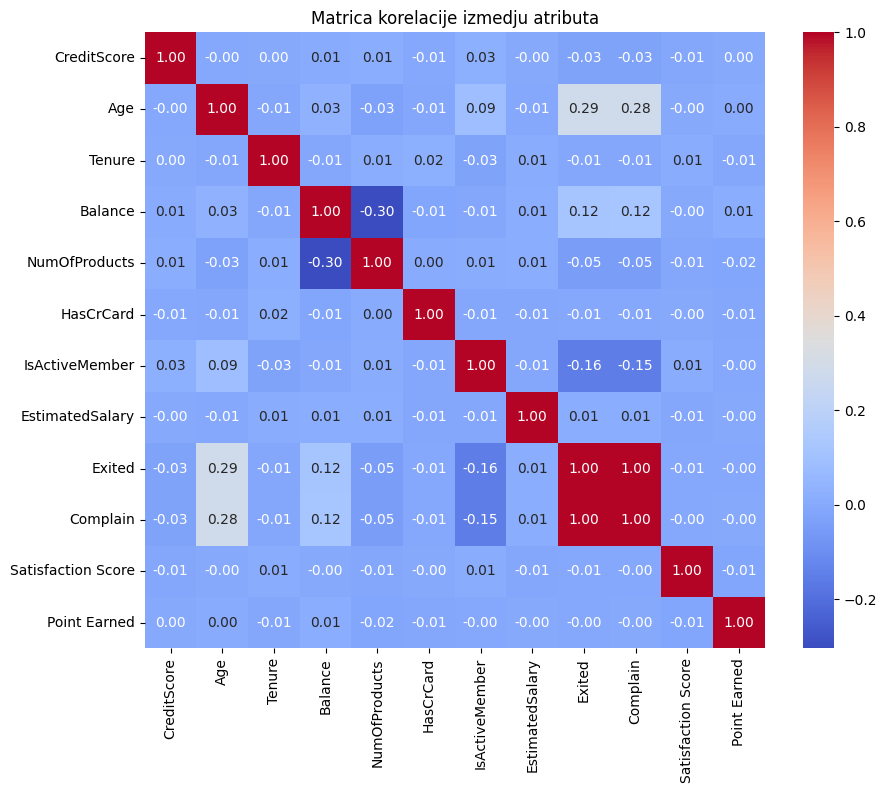

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Matrica korelacije izmedju atributa")
plt.show()


Vidimo da kolone Complain i Exited imaju 100% korelaciju i dalja analiza bi bila besmislena, jer bi modeli predvidjali na osnovu kolone Complain i nista ne bismo naucili iz podataka. Tako da dalju analizu nastavljamo bez te kolone.

In [8]:
data.drop(columns=['Complain'], inplace=True)

In [9]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,5.000000,1000.000000


## Data analysing

**RowNumber** — corresponds to the record (row) number and has no effect on the output.

**CustomerId** — contains random values and has no effect on customer leaving the bank.

**Surname**— the surname of a customer has no impact on their decision to leave the bank.

**CreditScore** — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

**Geography** — a customer’s location can affect their decision to leave the bank.

**Gender** — it’s interesting to explore whether gender plays a role in a customer leaving the bank.

**Age** — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

**Tenure** — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

**Balance** — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

**NumOfProducts** — refers to the number of products that a customer has purchased through the bank.

**HasCrCard** — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

**IsActiveMember** — active customers are less likely to leave the bank.

**EstimatedSalary** — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

**Exited** — whether or not the customer left the bank.

**Complain** — customer has complaint or not.

**Satisfaction Score** — Score provided by the customer for their complaint resolution.

**Card Type** — type of card hold by the customer.

**Points Earned**—the points earned by the customer for using credit card.

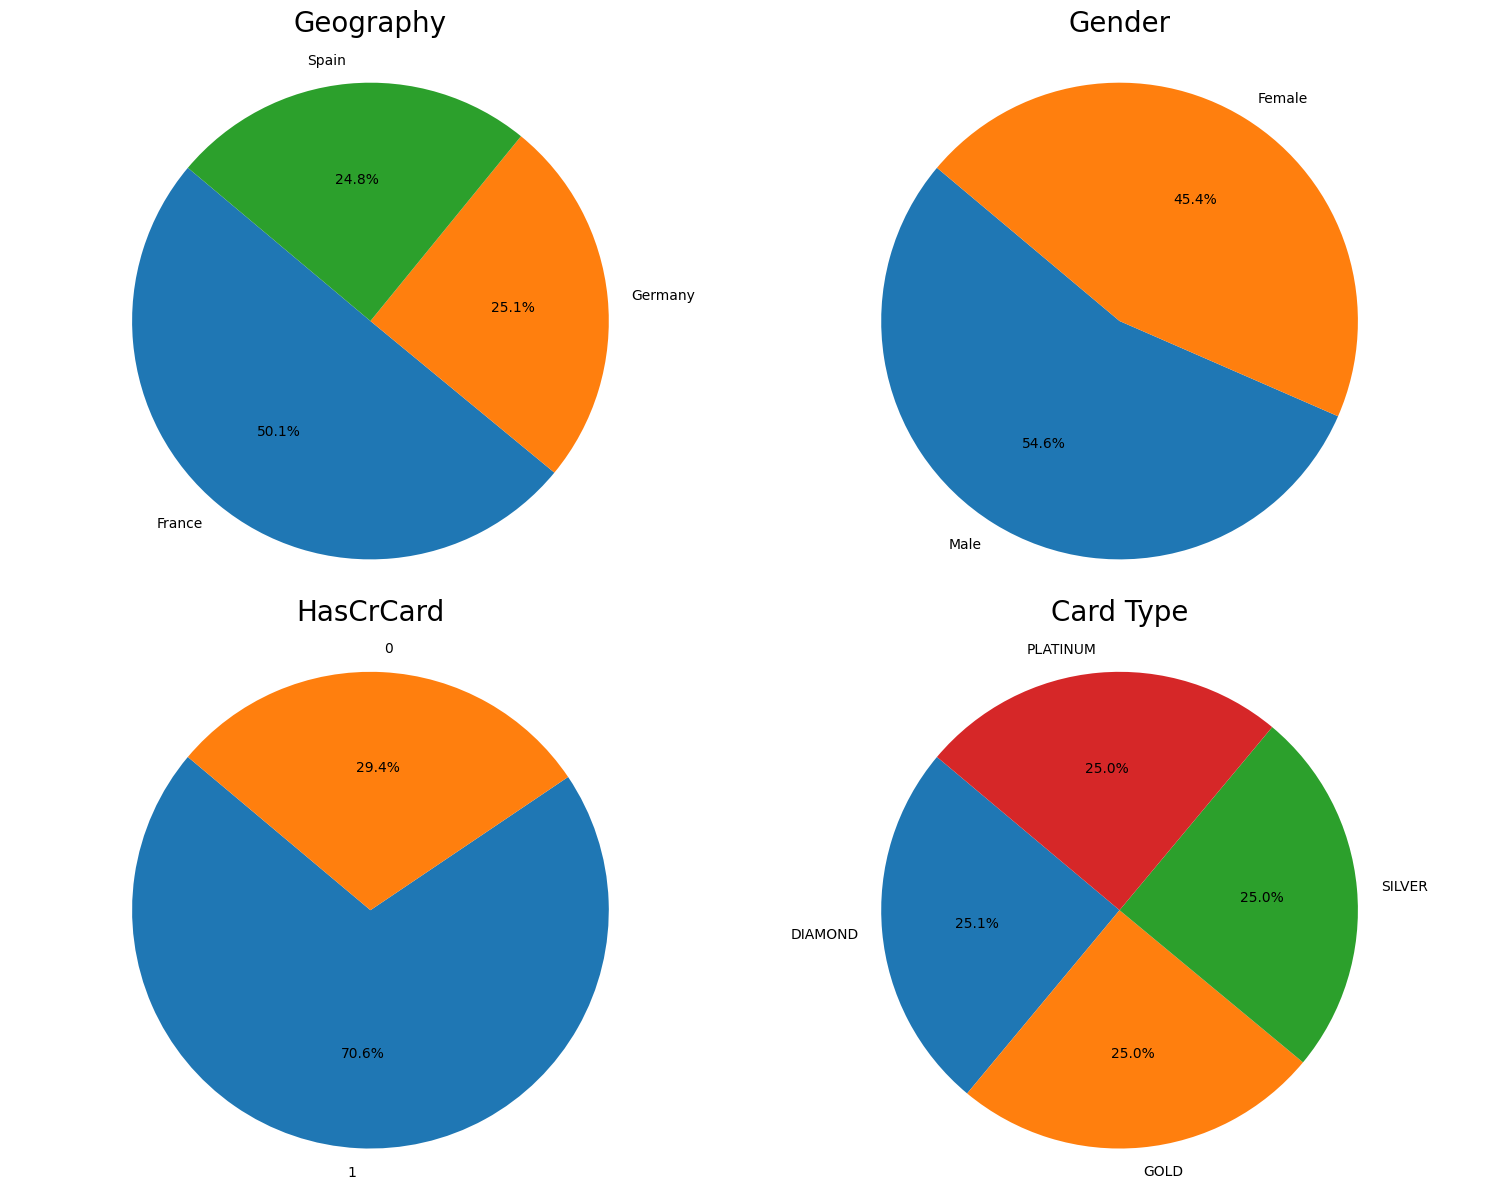

In [10]:
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'Card Type']

num_columns = 2  
num_rows = (len(categorical_columns) + 1) // num_columns  

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 12))

for i, column_name in enumerate(categorical_columns):
    value_counts = data[column_name].value_counts()
    
    ax = axes[i // num_columns, i % num_columns]
    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    ax.axis('equal')  
    title = ax.set_title(f'{column_name}', loc='center', pad=20, color='black')
    title.set_fontsize(20)
    
if len(categorical_columns) % 2 != 0:
    fig.delaxes(axes[-1, -1])
    
plt.tight_layout()
plt.show()

Sa grafikona iznad mozemo videti udeo svake vrednosti u kategorickim promenljivama, koje su nominalnog tipa. A ispod barplot-ove kategorickih svojstava ordinalnog tipa.

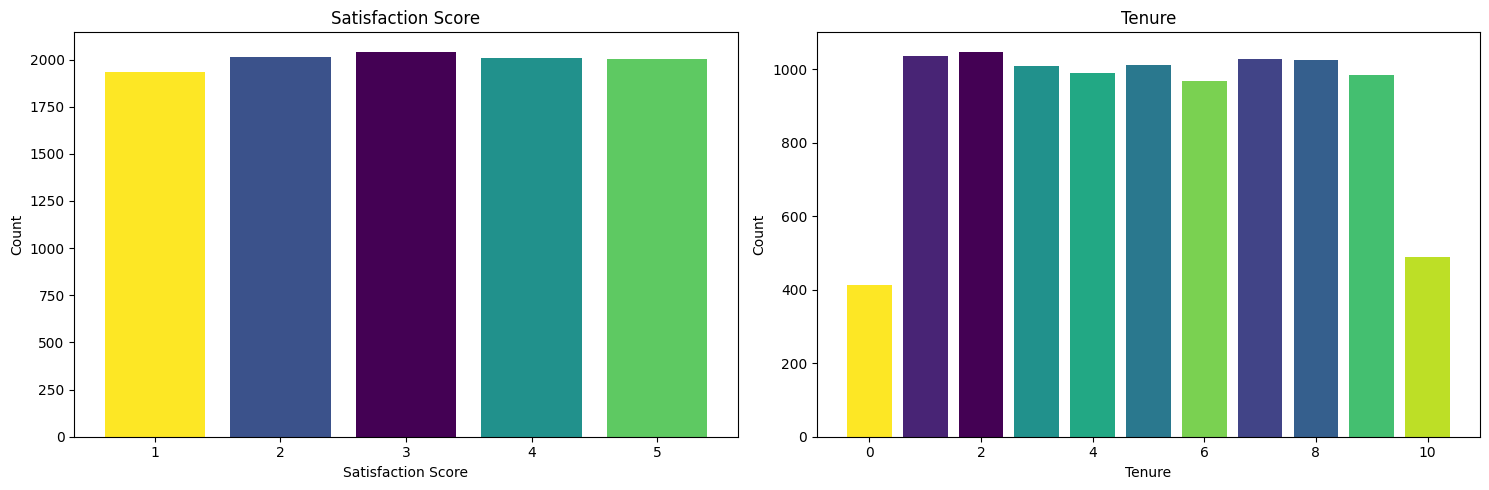

In [11]:
import numpy as np

categorical_columns = ['Satisfaction Score', 'Tenure']

num_columns = len(categorical_columns)
fig, axes = plt.subplots(1, num_columns, figsize=(15, 5))

for i, column_name in enumerate(categorical_columns):
    value_counts = data[column_name].value_counts()
    
    colors = plt.cm.viridis(np.linspace(0, 1, len(value_counts)))
    ax = axes[i]
    ax.bar(value_counts.index, value_counts.values, color=colors)
    
    ax.set_title(column_name)
    ax.set_xlabel(column_name)
    ax.set_ylabel('Count')
    
plt.tight_layout()

plt.show()

Raspodele numerickih atributa.

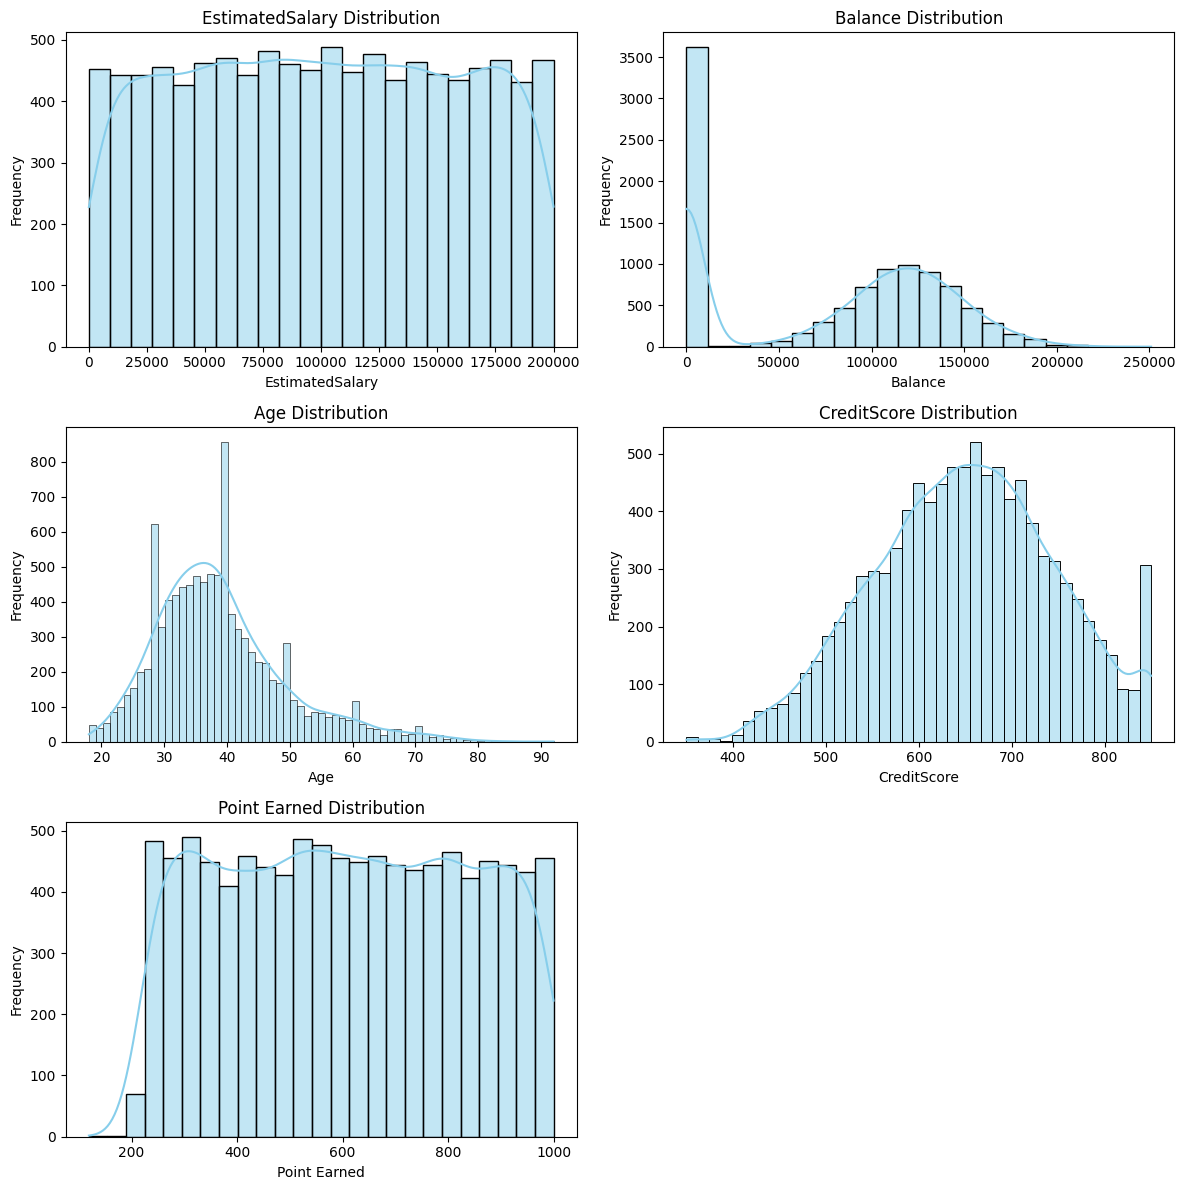

In [12]:
numeric_columns = ['EstimatedSalary', 'Balance', 'Age', 'CreditScore', 'Point Earned'] 

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for i, column_name in enumerate(numeric_columns):
    if i == 5:  
        continue
    
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.histplot(data[column_name], ax=ax, kde=True, color='skyblue')

    ax.set_title(f'{column_name} Distribution')
    
    ax.set_xlabel(column_name)
    ax.set_ylabel('Frequency')

row = 2
col = 1
empty_ax = axes[row, col]
empty_ax.set_axis_off()

plt.tight_layout()
plt.show()

Mozemo primetiti da su zarade gotovo uniformno raspodeljene, sto znaci da nam skup podataka sadrzi podjednako informacija za sve slojeve drustva. Iscrtavamo box plotove za atribute Balance, Age, CreditScore da bi proverili outlier-e.

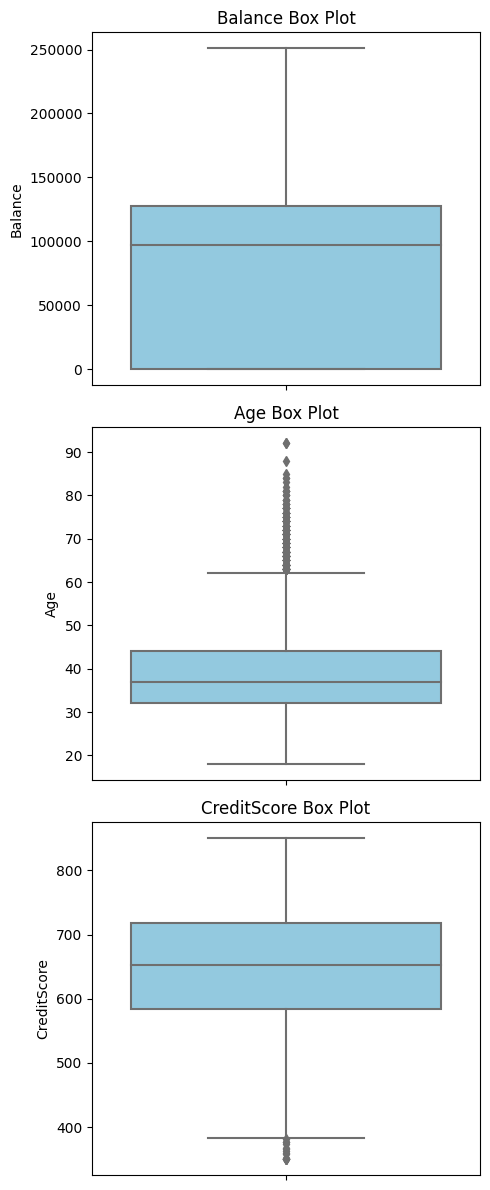

In [13]:
attributes = ['Balance', 'Age', 'CreditScore']

fig, axes = plt.subplots(3, 1, figsize=(5, 12))

# Prolazak kroz sve atribute za box plot
for i, attribute in enumerate(attributes):
    ax = axes[i]
    sns.boxplot(y=attribute, data=data, ax=ax, color='skyblue', orient='v')
    
    # Dodavanje naslova
    ax.set_title(f'{attribute} Box Plot')
    
    # Postavljanje oznaka za y osu
    ax.set_ylabel(attribute)

# Poboljšanje rasporeda subplot-ova
plt.tight_layout()

# Prikazivanje grafikona
plt.show()

Broj outlier-a i nije toliko znacajan pa cemo ih ostaviti, jer mogu sadrzati znacajne informacije.

In [14]:
data = pd.get_dummies(data, columns=['Geography', 'Gender', 'Card Type'])

In [15]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,2,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,3,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,3,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,5,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,5,425,0,0,1,1,0,0,1,0,0


Posto svaka od ovih kolona sadrzi najvise tri vrednosti, nije doslo do prevelikog povecavanja dimenzionalnosti.

In [16]:
Y = data['Exited']
X = data.drop('Exited', axis=1)
feature_names = X.columns
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,2,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,3,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,3,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,5,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,5,425,0,0,1,1,0,0,1,0,0


### Podaci za klasifikaciju

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=41)

In [18]:
from joblib import dump

dump((X_train, X_test, Y_train, Y_test), 'classification_data.joblib')

['classification_data.joblib']

### Podaci za klasterovanje

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(data=X_scaled, columns=X.columns)
dump((X, Y), 'clustering_data.joblib')

['clustering_data.joblib']